# Exercise 07.2
In this exercise we study quantitatively the statistical properties of a dataset consisting in different realizations of the potential energy of a system consisting of $108$ particles at thermal equilibrium. The configurations of the system are generated by means of a Monte Carlo simulation which makes use of the Metropolis algorithm.  
$M= 5 \times 10^5$ Monte Carlo steps are performed and the same amount of realizations of the potential energy are computed.
The system is already thermalized after $n_{therm} = 50000$ thermalization steps.  
The plots on the left show the instantaneous values of the potential energy per particle of the system after each Monte Carlo step, while the plots on the right show the instantaneous values of the Metropolis acceptance ratio. Each pair of plots concerns one of th three phases the system is studied at (see following sections for detailes on the physical parameters).  
The values of $\Delta $ (which is the magnitude of the Metropolis step) are tuned such that these acceptances are close to the optimal $50 \%$.

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
# Define phases of matter
phases = ["Solid", "Liquid", "Gas"]
steps = [0, 0, 0]
steps_acc = [0, 0, 0]
data = [0, 0, 0]
err = [0, 0, 0]
accept = [0, 0, 0]

#load data from files
for i in range(3):
    steps[i], data[i], err[i] = np.loadtxt(phases[i] + "07.2/potential_energy.dat", usecols=(0, 1, 3), skiprows=1, unpack=True)
    steps_acc[i], accept[i] = np.loadtxt(phases[i] + "07.2/acceptance.dat", usecols=(0, 1), skiprows=1, unpack=True)

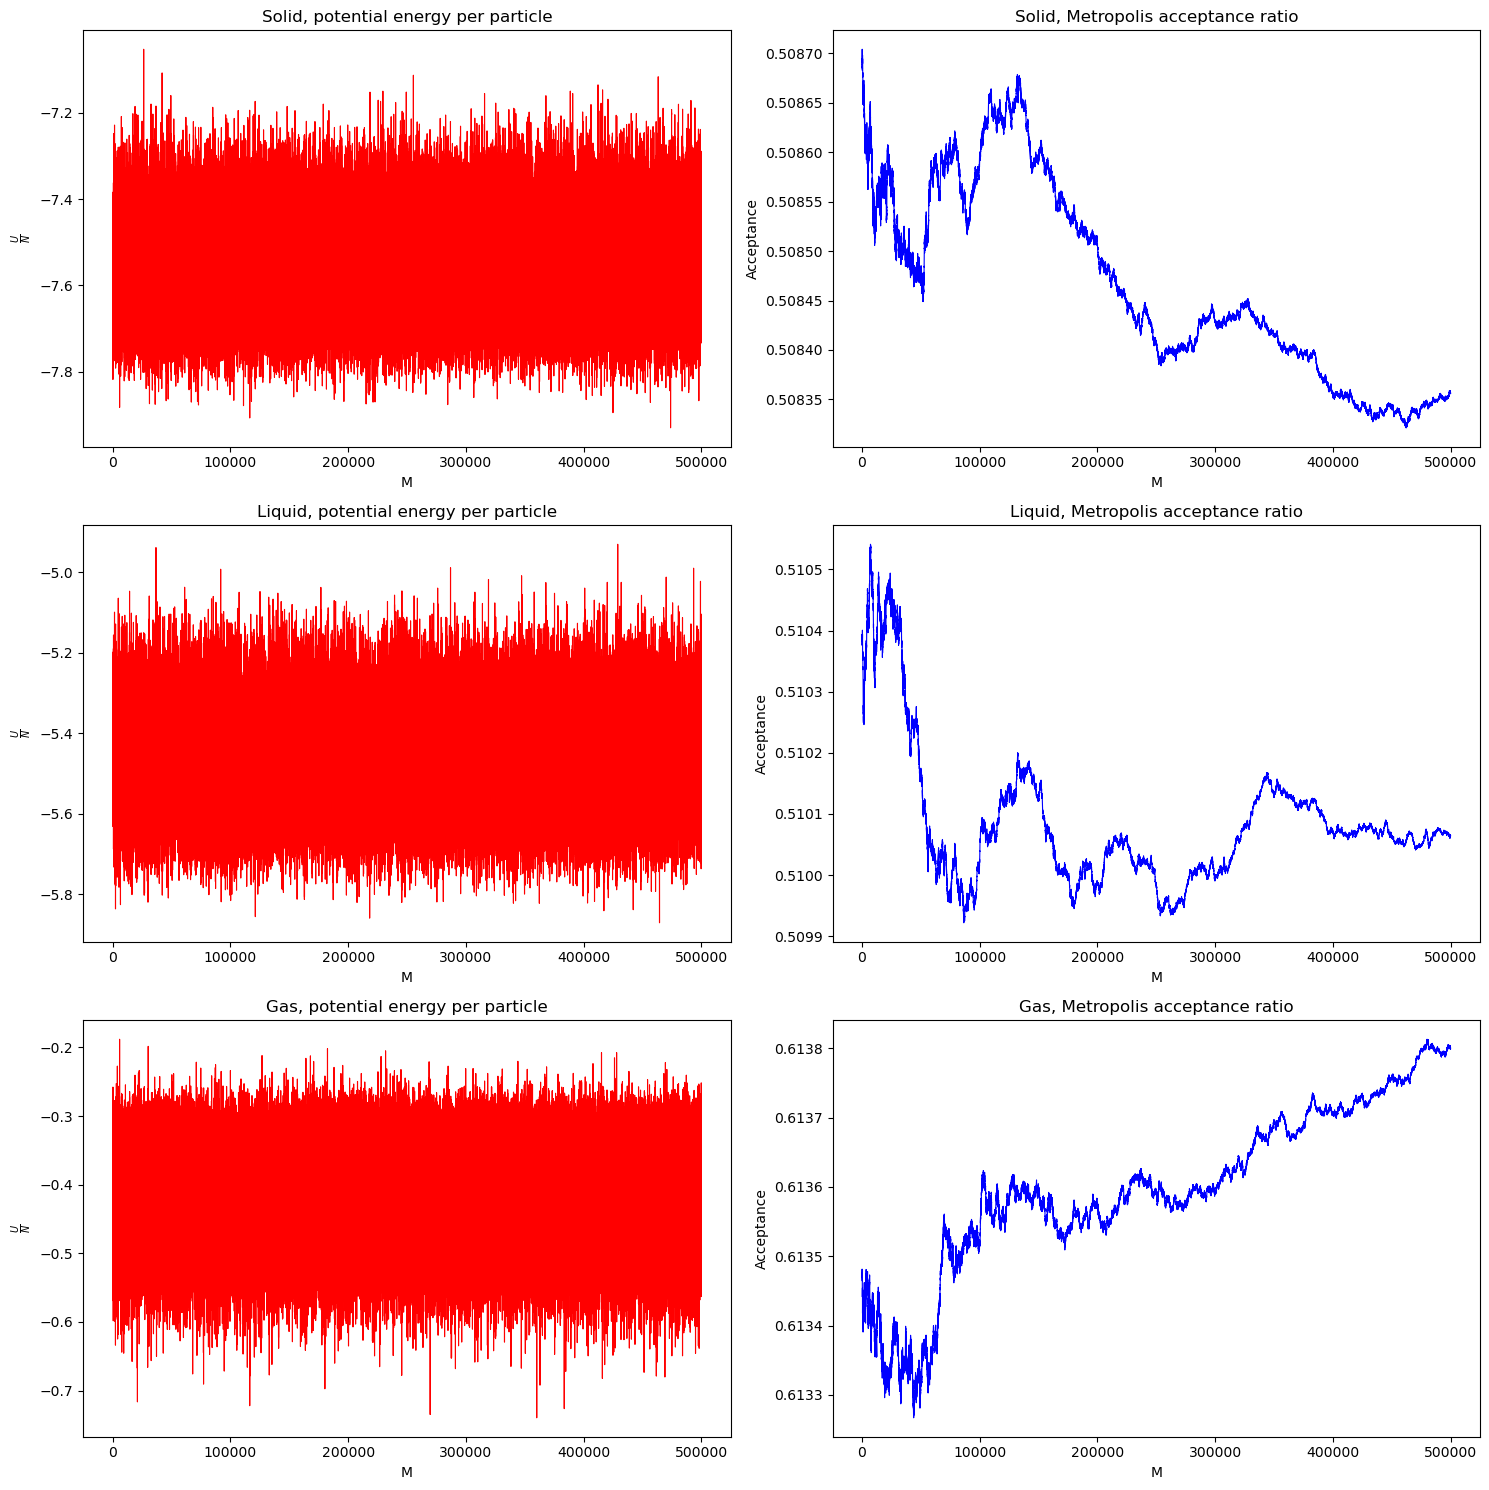

In [6]:
# Define the dimensions of the plot
fig, axx = plt.subplots(3, 2, figsize=(15, 15), tight_layout=True)

# Loop through different phases
for i in range(3):
    # Select subplot for potential energy
    ax_1=axx[i][0]
    # Select subplot for acceptance ratio
    ax_2=axx[i][1]
    
    # Plot potential energy data
    ax_1.plot(steps[i], data[i], linestyle="-", color="r", linewidth=0.8)
    ax_1.set_xlabel("M")  # Set x-axis label
    ax_1.set_ylabel(r"$\frac{U}{N}$")  # Set y-axis label
    ax_1.set_title(phases[i]+", potential energy per particle")  # Set title
    
    # Plot acceptance ratio data
    ax_2.plot(steps_acc[i], accept[i], linestyle="-", color="b", linewidth=0.8)
    ax_2.set_xlabel("M")  # Set x-axis label
    ax_2.set_ylabel(r"Acceptance")  # Set y-axis label
    ax_2.set_title(phases[i]+", Metropolis acceptance ratio")  # Set title


## Study of standard deviation of the mean
Here we study the relation between the standard deviation $\sigma$ of the sample and the number of blocks we divide the sample itself.
We remind that the standard deviation of the mean of a sample computed with data-blocking technique is:
$$\sigma\simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
where $N$ is the number of blocks and $A_i = \frac{1}{L} \sum_{j=i}^{L+i} a_j $ is the avergae of the quantity over the $i^{th}$ block ($L=\frac{M}{N}$ is the number of steps in a single block).
The plots show the evolution of $\sigma$ as a function of $L$ for each phase.

In [13]:
def variance(data):
    # Check if the array has only one element
    if data.shape[0]==1:
        return 0
    
    # Compute the sum of squares of the elements in the array
    sum_sq = np.sum(data*data)
    
    # Compute the sum of the elements in the array
    sum = np.sum(data)
    
    # Get the number of elements in the array
    dim = data.shape[0]
    
    # Compute and return the variance
    return (sum_sq/dim - (sum/dim)**2)/(dim-1)


In [8]:
#Define array of lengths
L = [10, 16, 20, 25, 32, 40, 50, 80, 100, 125, 160, 200, 250, 400, 500, 625, 800, 1000, 1250, 2000, 2500, 3125, 4000, 5000
    , 6250, 10000 ]

#Define array of number of blocks
N = steps[0][-1]/L
N=N.tolist()

#Define 3 arrays (one for each phase) containing values of sigma
sigmas = [ np.zeros(np.shape(L)), np.zeros(np.shape(L)), np.zeros(np.shape(L)) ]

In [14]:
#Iterate over phases
for i in range(3):
    
    #define iteration parameter
    j=0
    
    #Iterate over block lengths
    for length in L:
        
        #array of block averages
        averages=np.zeros(int(N[j]))
        
        #fill the array with the block averages
        for k in range(np.shape(averages)[0]):
            block      = data[i][k*length : (k+1)*length]
            averages[k] = np.sum(block)/length
        
        #Now compute the variance of the array of averages
        sigmas[i][j] = np.sqrt(variance(averages))
        j+=1   

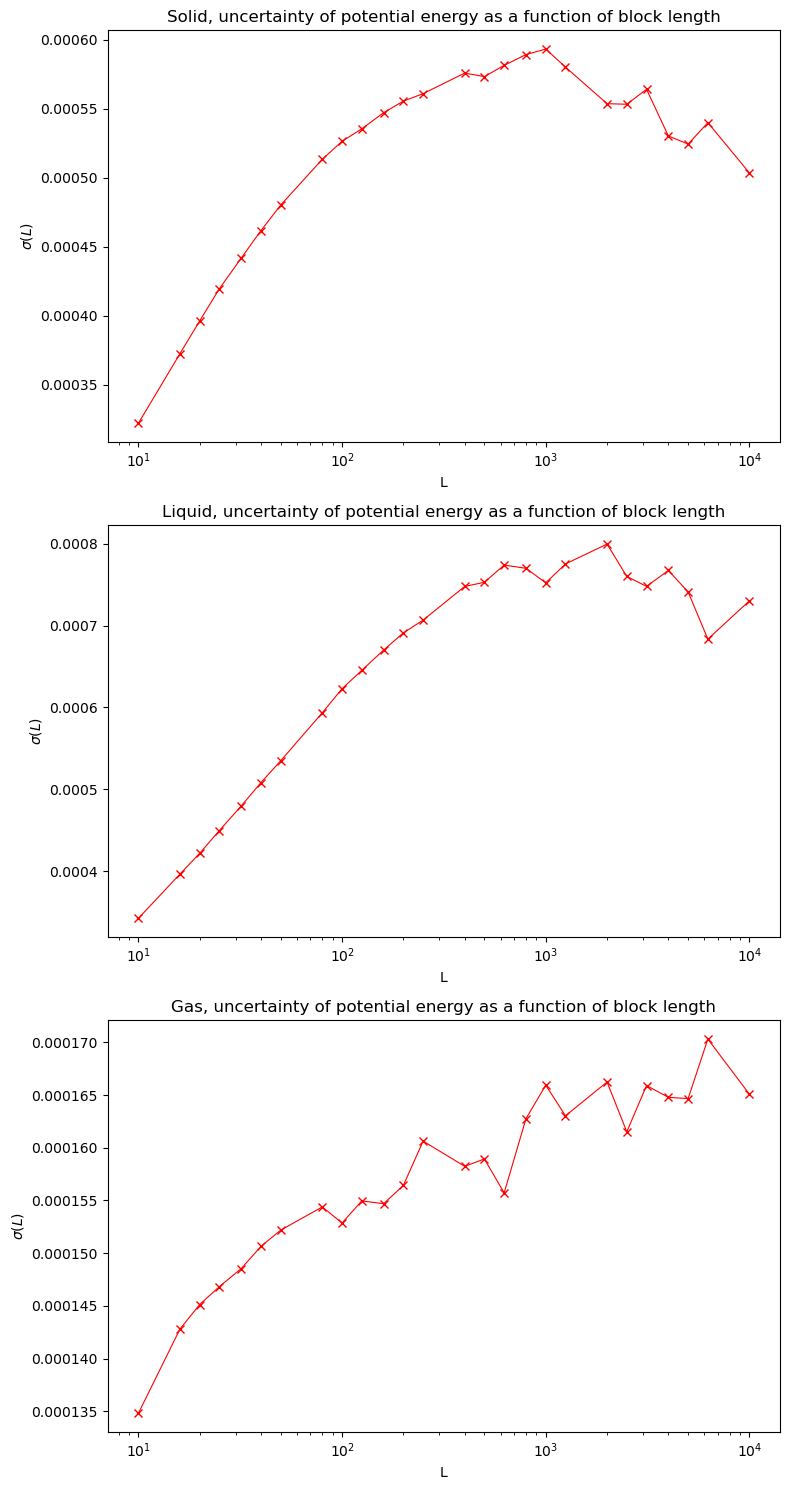

In [15]:
# Define the dimensions of the plot
fig, axx = plt.subplots(3, 1, figsize=(8, 15), tight_layout=True)

# Loop through different phases
for i in range(3):
    ax=axx[i]  # Select subplot
    
    # Plot the uncertainty of potential energy as a function of block length
    ax.plot(L, sigmas[i], linestyle="-", marker="x", color="r", linewidth=0.8)
    
    # Set x-axis scale to logarithmic
    ax.set_xscale('log')
    
    # Set title of the plot
    ax.set_title(phases[i]+", uncertainty of potential energy as a function of block length")
    
    # Set x-axis label
    ax.set_xlabel("L")
    
    # Set y-axis label
    ax.set_ylabel(r"$\sigma(L)$")


By observing the plots, we can see that the statistical uncertainty grows until it reaches a saturation value for $L \simeq 1000$, after which the growth slows down or stops at all. For even higher values of $L$, the uncertainty seems to decrease again.  

## Study of autocorrelation
The autocorrelation of an observable at a certain time $t$ measures how much the value of the observable at such time is correlated with the value of itself at the time $t=0$. The value of the autocorrelation of a set of samples of an observable $O$, whose values are given at discrete timesteps ranging from $t_0 = 0$ from $t_{max}$, at time $t$ is:
$$ \chi(t) = \frac{\frac{1}{t_{max}-t}\sum_{t'=0}^{t_{max}-t}O(t')O(t'+t) -\frac{1}{(t_{max}-t)^2}\sum_{t'=0}^{t_{max}-t}O(t')\sum_{t'=0}^{t_{max}-t}O(t'+t)}{\sigma^2}$$
with $\sigma^2$ the variance of the full set.  
Here we compute and plot the autocorrelation of the potential energy per particle for $t \in [0, 500]$, with $t_{max} = M -1 $.

In [16]:
# Initialize arrays to store time and autocorrelation data
times = [0, 0, 0]
correls = [0, 0, 0]

# Loop through different phases
for i in range(3):
    # Load time and autocorrelation data from file
    times[i], correls[i] = np.loadtxt(phases[i] + "07.2/autocorrelation.dat", usecols=(0, 1), skiprows=1, unpack=True)


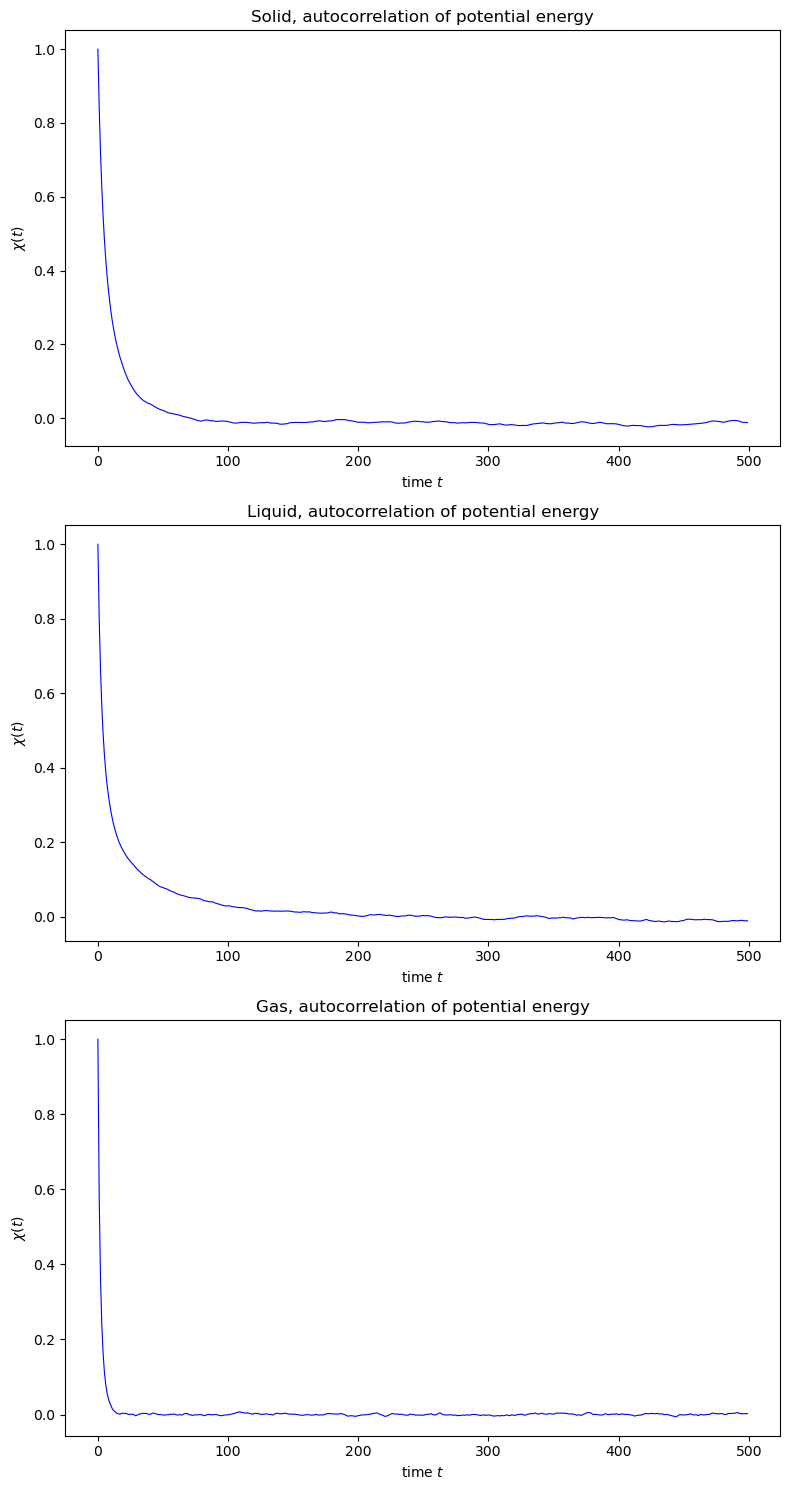

In [17]:
# Define the dimensions of the plot
fig, axx = plt.subplots(3, 1, figsize=(8, 15), tight_layout=True)

# Loop through different phases
for i in range(3):
    ax_1=axx[i]  # Select subplot
    
    # Plot autocorrelation of potential energy
    ax_1.plot(times[i], correls[i], marker=" ", linestyle="-", color="b", linewidth=0.8)
    
    # Set x-axis label
    ax_1.set_xlabel("time $t$")
    
    # Set y-axis label
    ax_1.set_ylabel(r"$\chi(t)$")
    
    # Set title of the plot
    ax_1.set_title(phases[i]+", autocorrelation of potential energy")


The results show clearly that the autocorrelation is negligible for any phase after at least $300$ Monte Carlo steps.

# Exercise 07.4
## Parameters of NVT (Metropolis) simulation
| Phase  | $\rho$ | $T$ | $r_c$ | $\Delta$ |
| :-----  | ------: | ---: | -----: | --------: |
| Solid  | $1.1$  | $0.8$ | $2.2$ | $0.055$  |
| Liquid | $0.8$  | $1.1$ | $2.5$ | $0.1$ |
| Gas    | $0.05$ | $1.2$ | $5.0$ | $10.0$ |

The values for $\delta t$ have been tuned such that the Metropolis acceptance ratio is the closest possible to $50\%$. Concerning the gas phase, I was not able to lower such value under $61\%$.  
Basing our choice on the analysis performed previously, we consider $N=100$ blocks of $L=5000$ steps per block to be an optimal choice to obtain relevant statistics by means of the data-blocking technique. The following plots show the progressive block averages of potential energy and pressure as a function of the blocks.  

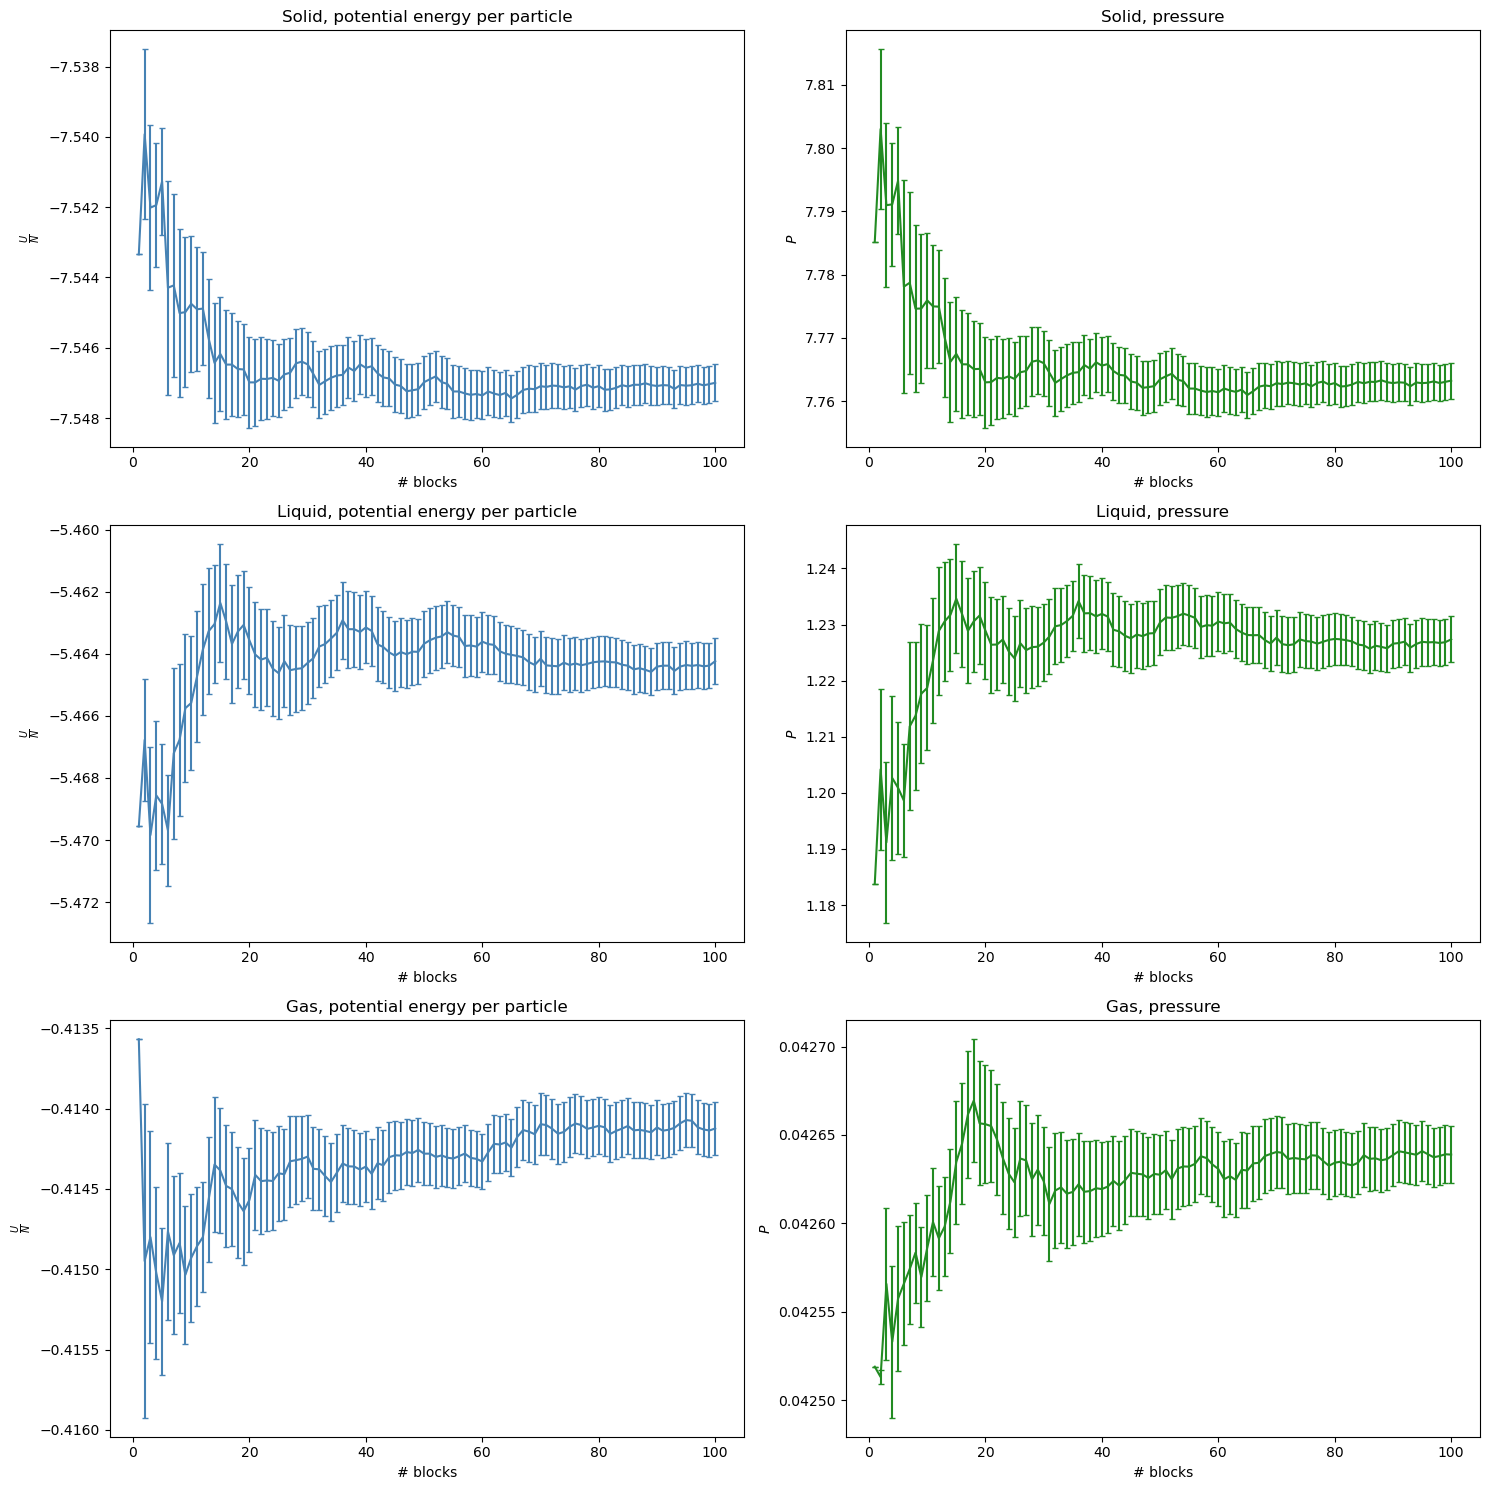

In [18]:
# Define the dimensions of the plot
fig, axx = plt.subplots(3, 2, figsize=(15, 15), tight_layout=True)

# Loop through different phases
for i in range(3):
    ax_1=axx[i][0]  # Select subplot for potential energy
    ax_2=axx[i][1]  # Select subplot for pressure
    
    # Load potential energy data
    blocks, energy, energy_errs = np.loadtxt(phases[i]+"07.34/potential_energy.dat", usecols=(0, 2, 3), skiprows=1, unpack=True)
    
    # Plot potential energy data
    ax_1.errorbar(blocks, energy, yerr=energy_errs, capsize=2.5, color="steelblue")
    
    # Set x-axis label for potential energy plot
    ax_1.set_xlabel("# blocks")
    
    # Set y-axis label for potential energy plot
    ax_1.set_ylabel(r"$\frac{U}{N}$")
    
    # Set title for potential energy plot
    ax_1.set_title(phases[i]+", potential energy per particle")
    
    # Load pressure data
    blocks, press, press_errs = np.loadtxt(phases[i]+"07.34/pressure.dat", usecols=(0, 2, 3), skiprows=1, unpack=True)
    
    # Plot pressure data
    ax_2.errorbar(blocks, press, yerr=press_errs, capsize=2.5, color="forestgreen")
    
    # Set x-axis label for pressure plot
    ax_2.set_xlabel("# blocks")
    
    # Set y-axis label for pressure plot
    ax_2.set_ylabel(r"$P$")
    
    # Set title for pressure plot
    ax_2.set_title(phases[i]+", pressure")


## Radial distribution function $g(r)$
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
The pair distribution function gives the probability of finding to particles at distance $r$, compared with the same probability for an ideal gas. It is therefore defined as: 
$$g(\vec{r_1},\vec{r_2}) = \frac{\rho_N (\vec{r_1},\vec{r_2})}{\rho_N^2} $$
Where $\rho_N = \frac{N}{V}$ is the particle density distribution of the ideal gas, which is uniform in the whole volume. In a homogenous fluid, where the interactions depend only on the distance between particles (like a fluid governed by a Lennard-Jones potential), $g(\vec{r_1},\vec{r_2}) = g(| \vec{r_1}-\vec{r_2} |) = g(r)$.

We now compare the radial distribution function computed with Metropolis algorithm (NVT simulation) and one computed simulating the evolution of the system by numerical integration of equations of motion (NVE simulation).
## Parameters of NVE (Verlet) simulation
| Phase | $\rho$ | $T$ | $T_{therm}$ | $r_c$ | $\delta t$ |
| :-----  | ------: | ---:  | ----:  | -----: | --------: |
| Solid   | $1.1$   | $0.8$ | $1.55$ | $2.2$  | $0.001$   |
| Liquid  | $0.8$   | $1.1$ | $1.98$ | $2.5$  | $0.0005$  |
| Gas     | $0.05$  | $1.2$ | $0.9$  | $5.0$  | $0.0005$  |

Obviously, in order for the results to be comparable, $N=100$ and $L=5000$.  
The plots show the total block average of the radial distribution function $g(r)$ as a function of $r$, both from the NVT (light blue) and NVE (orange) simulations, with their statistical uncertaintes.  
We also show (plots on the right) the absolute value of the difference between the values of $g(r)$ obtained from the two different simulations. The errors of $|g(r)_{NVT}-g(r)_{NVE}|$ are obtained by means of error propagation.  
In particular: 
$$ \sigma_{diff} = \sqrt{\sigma^2_{NVT}+\sigma^2_{NVE}} $$
__NOTE:__ The real temperature the NVE simulation thermalizes at is not exactly the one indicated in the table. See below

In [19]:
# Initialize arrays to store real temperatures and uncertainties
temps = [0. ,0. ,0.]
uncert = [0. ,0. ,0.]

# Loop through different phases
for i in range(3):
    # Load real temperatures and uncertainties from file
    temps[i], uncert[i] = np.loadtxt(phases[i] + "/temperature.dat", usecols=(2, 3), skiprows=100, unpack=True)

# Print real thermalization temperatures
print("Real thermalization temperatures: ")
print("=================================")
for i in range(3):
    print(phases[i], " ", format(temps[i], '.4f'), "+/-", format(uncert[i], '.4f'))
print("=================================")


Real thermalization temperatures: 
Solid   0.8047 +/- 0.0001
Liquid   1.0980 +/- 0.0009
Gas   1.1530 +/- 0.0022


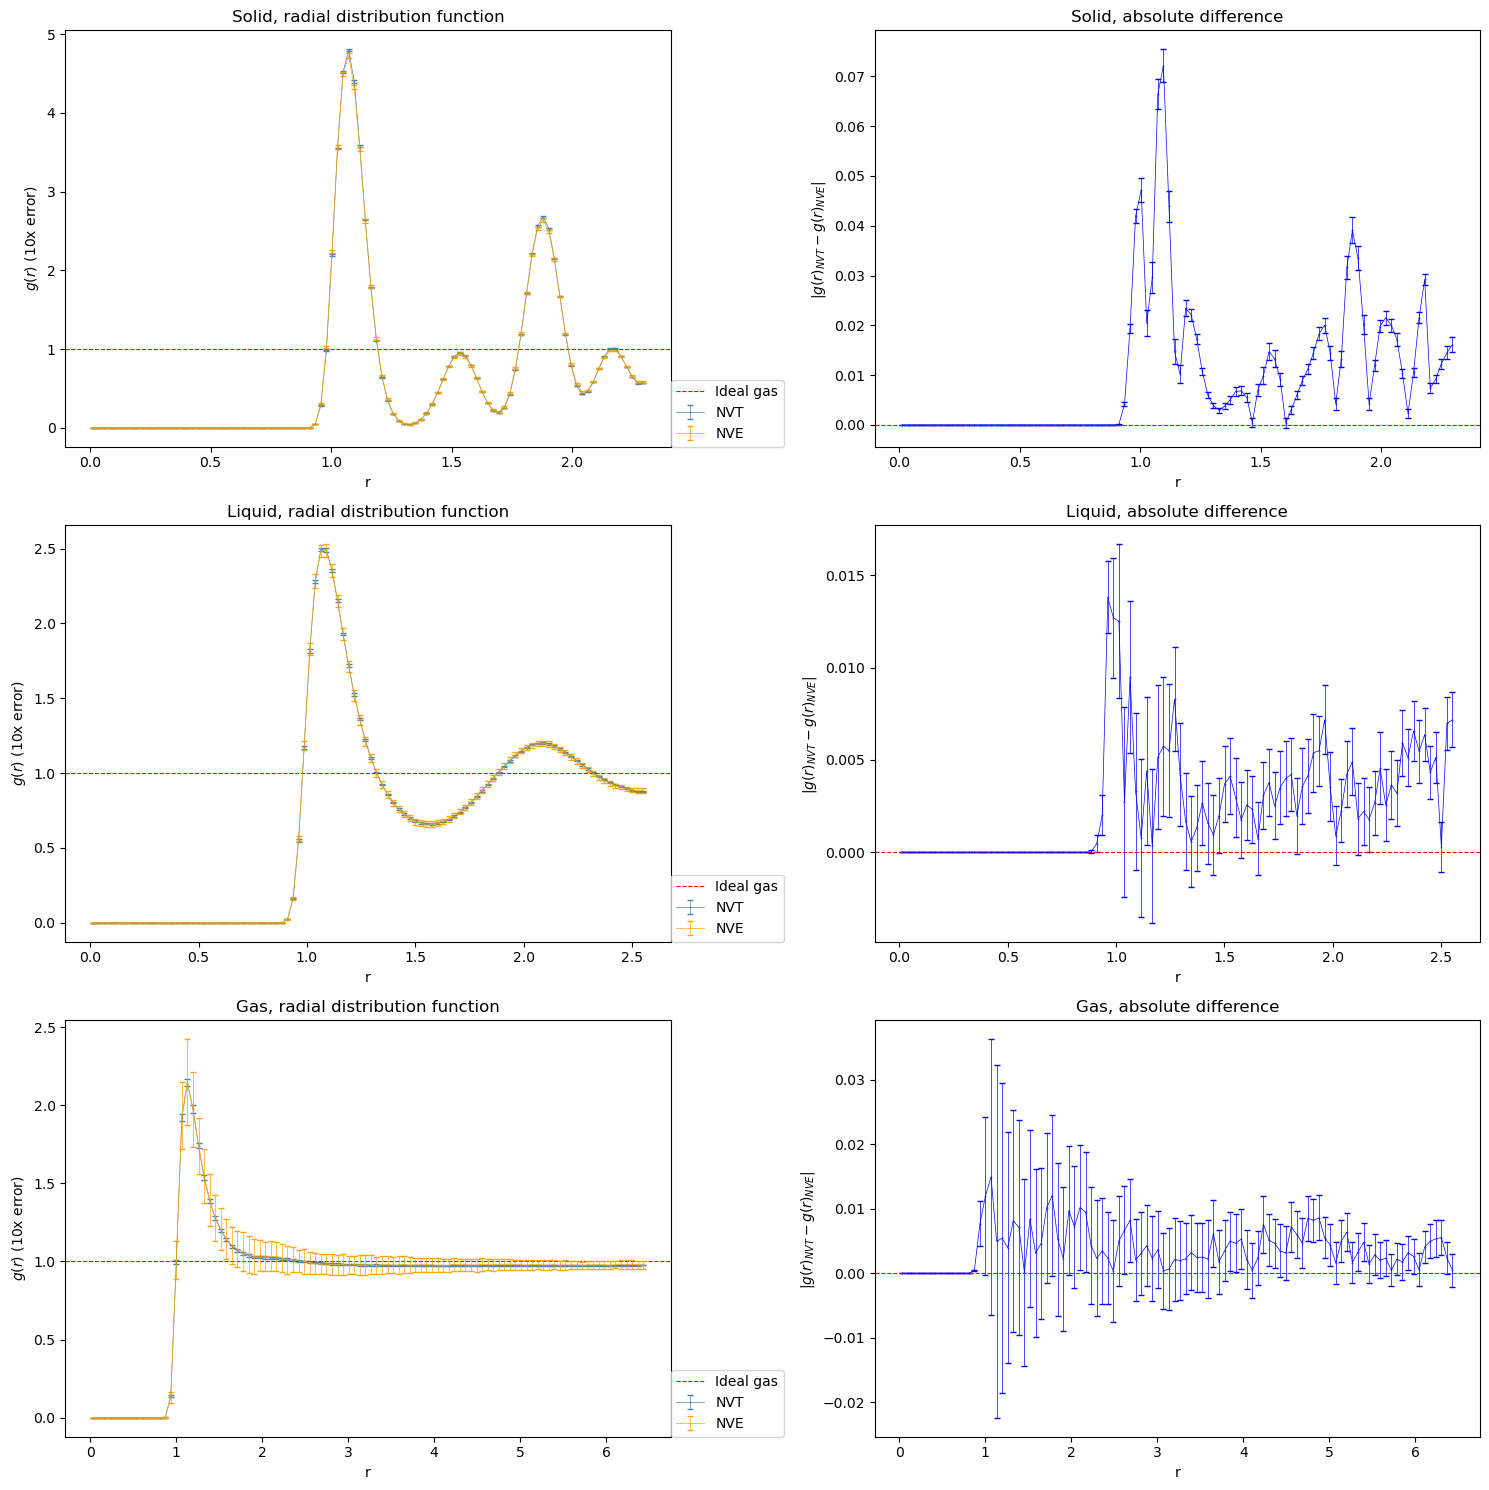

In [20]:
# Define the dimensions of the plot
fig, axx = plt.subplots(3, 2, figsize=(15, 15), tight_layout=True)

# Loop through different phases
for i in range(3):
    ax_1=axx[i][0]  # Select subplot for radial distribution function
    ax_2=axx[i][1]  # Select subplot for absolute difference
    
    # Load NVT radial distribution function data
    radii_NVT, gofr_NVT, uncerts_NVT = np.loadtxt(phases[i] + "07.34/gofr.dat", usecols=(0, 1, 2), skiprows=1, unpack=True)
    
    # Plot NVT radial distribution function data
    ax_1.errorbar(radii_NVT, gofr_NVT, yerr=10*uncerts_NVT, marker='.', markersize=0.5, linestyle="solid", color="steelblue", linewidth=0.5, capsize=2.5, label="NVT")
    
    # Plot ideal gas value for reference
    ax_1.axhline(y=1.0, linestyle='--', color='r', linewidth=0.8, label="Ideal gas")
    
    # Load NVE radial distribution function data
    radii_NVE, gofr_NVE, uncerts_NVE = np.loadtxt(phases[i] + "/gofr.dat", usecols=(0, 1, 2), skiprows=1, unpack=True)
    
    # Plot NVE radial distribution function data
    ax_1.errorbar(radii_NVE, gofr_NVE, yerr=10*uncerts_NVE, marker='.', markersize=0.5, linestyle="solid", color="orange", linewidth=0.5, capsize=2.5, label="NVE")
    
    # Set x-axis label for radial distribution function plot
    ax_1.set_xlabel("r")
    
    # Set y-axis label for radial distribution function plot
    ax_1.set_ylabel(r"$g(r)$ (10x error)")
    
    # Set title for radial distribution function plot
    ax_1.set_title(phases[i]+", radial distribution function")
    
    # Add legend to radial distribution function plot
    ax_1.legend(loc=(1, 0))
    
    # Compute absolute difference between NVT and NVE radial distribution functions
    diff = np.abs(gofr_NVT-gofr_NVE)
    diff_err = np.sqrt(uncerts_NVT**2 + uncerts_NVE**2)
    
    # Plot absolute difference
    ax_2.errorbar(radii_NVT, diff, yerr=diff_err, marker='.', markersize=0.5, linestyle="solid", color="blue", linewidth=0.5, capsize=2.5)
    
    # Plot horizontal line at y=0
    ax_2.axhline(y=0., linestyle='--', color='r', linewidth=0.8)
    
    # Set x-axis label for absolute difference plot
    ax_2.set_xlabel("r")
    
    # Set y-axis label for absolute difference plot
    ax_2.set_ylabel(r"$|g(r)_{NVT}-g(r)_{NVE}|$ ")
    
    # Set title for absolute difference plot
    ax_2.set_title(phases[i]+", absolute difference")


The curves obtained from different simulations follow the same qualitative behaviour. Nonetheless, the results concerning the solid phase are not compatible due to the very small uncertaintes. 